In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from root_numpy import root2array
from collections import OrderedDict

In [2]:
phmaxes = [ 70, 90, 190, 390, 410 ]
mytypes = [ 'p', 'e' ]
names = { 'e': 'Single Electron', 'p': 'Single Proton'}
masses = { 'e' : 0.000511, 'p' : 0.938 }
filebase, filemiddle, fileend = 'output/','_reco_smallwindow_thres','.root'

type_phmax_file = OrderedDict()
for phmax in phmaxes:
    for mytype in mytypes:
        type_phmax_file.update( { (mytype,phmax) : filebase + mytype + filemiddle + str(phmax) + fileend } )  

In [3]:
dfs = OrderedDict()
for mytypephmax, myfile in type_phmax_file.iteritems():
    dfs.update( { mytypephmax : pd.DataFrame( root2array( myfile, 'ana_tree' ) ) } )

In [4]:
def genEffsVsEandXpos(mytype, myphmax):
    
    df = dfs[(mytype,myphmax)]  
    mass = masses[mytype]
    nbins = 40
    
    myx = df['x_pos']
    myy = (df['energy'] - mass)*1000.
    
    plt.figure(figsize=(5,3))
    denominator, meaningless, variable, here = plt.hist2d(myx, myy, bins=nbins)
    plt.title('Denominator')
    plt.colorbar()
    
    df = df.query('n_trigs > 0')
    myx = df['x_pos']
    myy = (df['energy'] - mass)*1000.
    
    plt.figure(figsize=(5,3))
    numerator, meaningless, variable, here = plt.hist2d(myx, myy, bins=nbins)
    plt.colorbar()
    plt.title('Numerator')
   
    plt.figure(figsize=(10,6))
    plt.imshow((numerator/denominator).T, \
               extent=(myx.min(), myx.max(), myy.min(), myy.max()), \
               origin='lower', interpolation='none', \
               vmin=0, vmax=1.)
    plt.colorbar()
    plt.xlabel('Distance from PMT Plane [cm]',fontsize=14)
    plt.ylabel('Kinetic Energy [MeV]',fontsize=14)
    plt.title('%s Efficiency, PE > %0.1f Cut'%(names[mytype], myphmax/20.),fontsize=20)
    plt.grid(True)

def plotAllEffsVsEandXpos():
    plt.figure(figsize=(10,6))
    for mytype in ['p', 'e']:
        for myphmax in phmaxes:
            genEffsVsEandXpos(mytype,myphmax)

/Library/Python/2.7/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


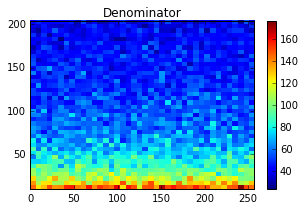

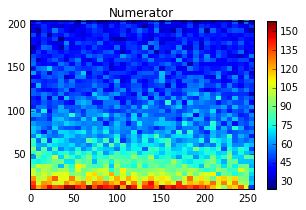

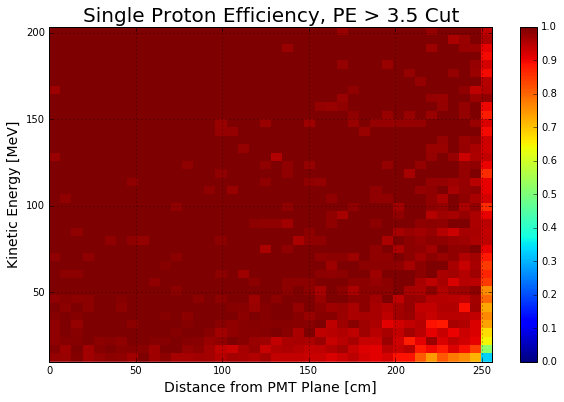

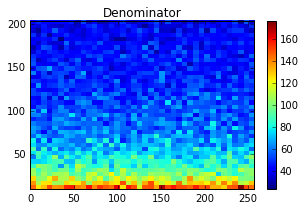

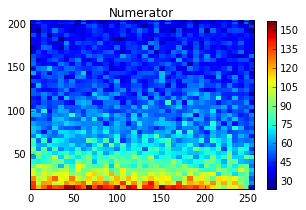

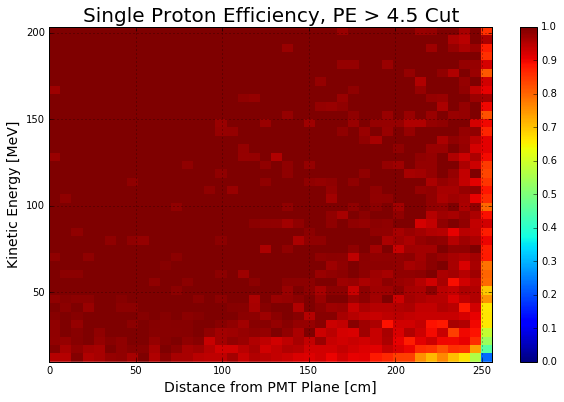

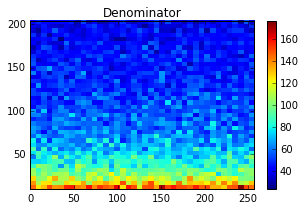

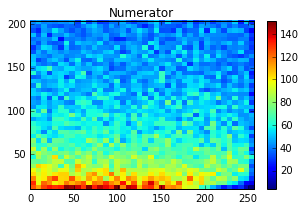

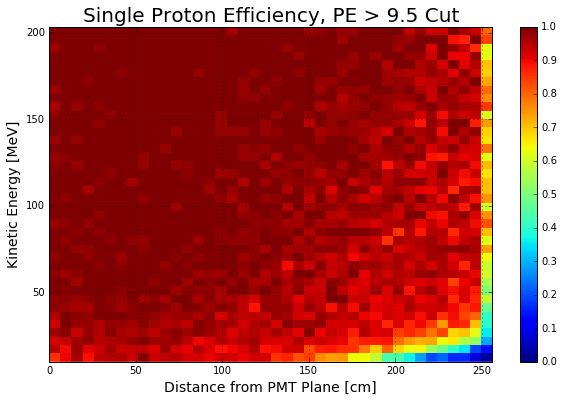

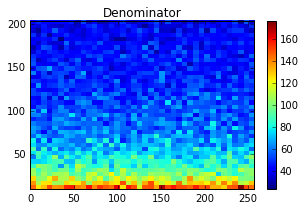

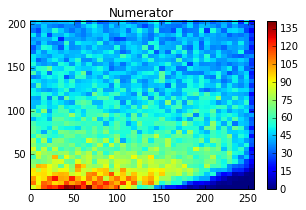

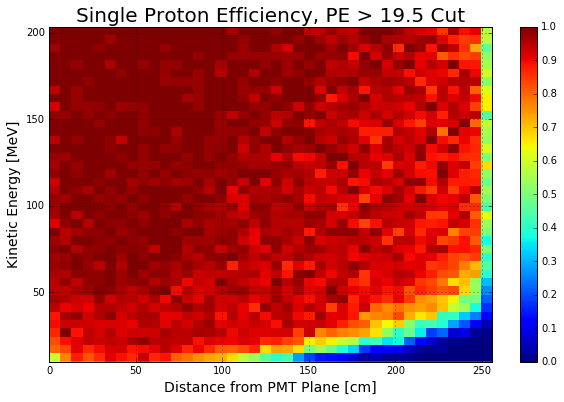

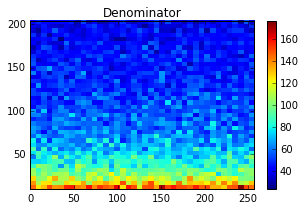

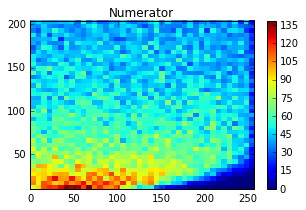

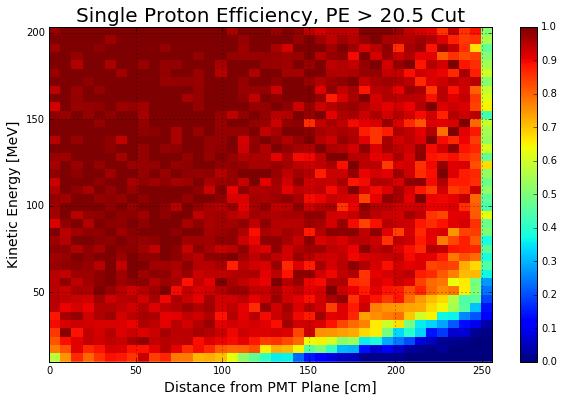

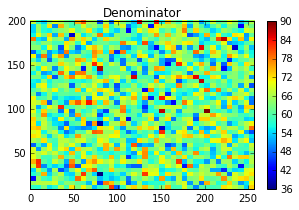

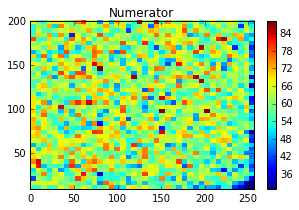

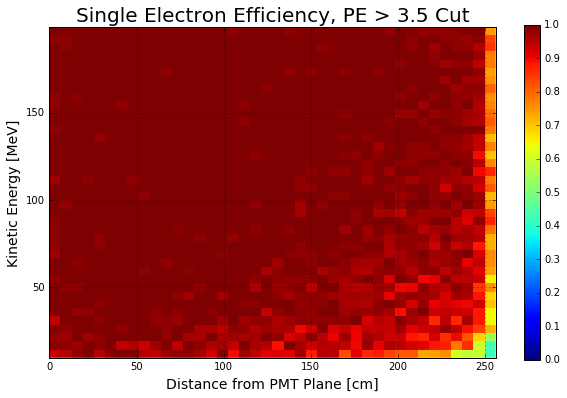

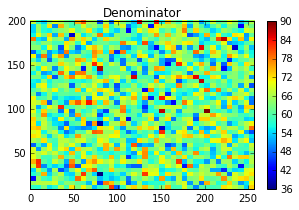

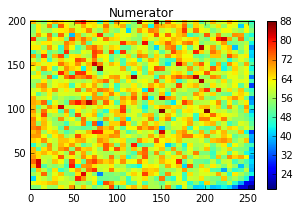

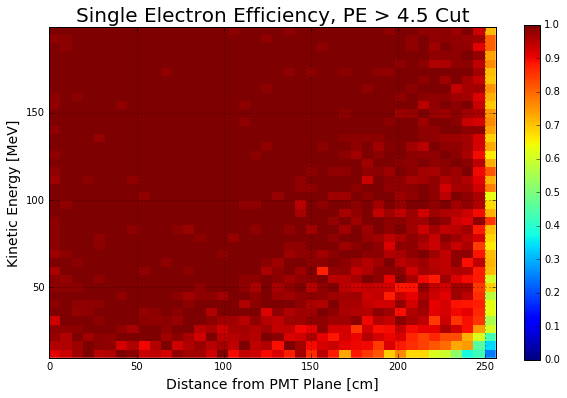

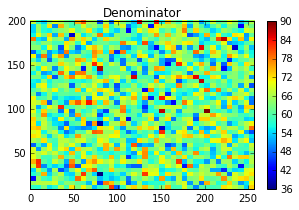

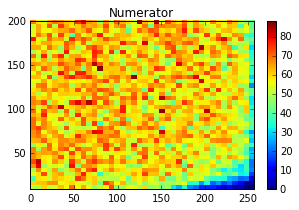

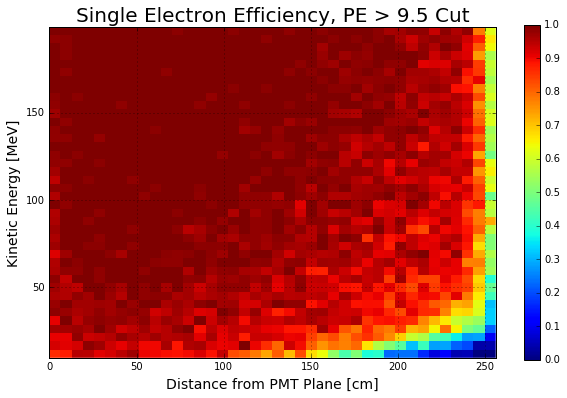

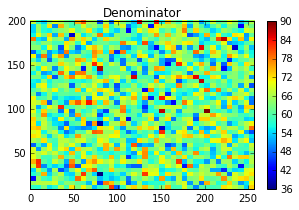

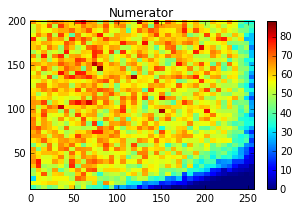

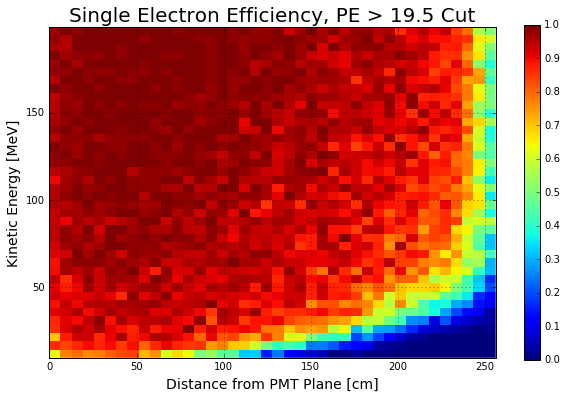

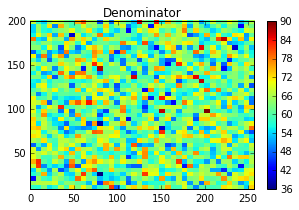

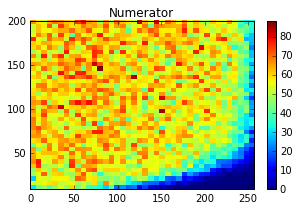

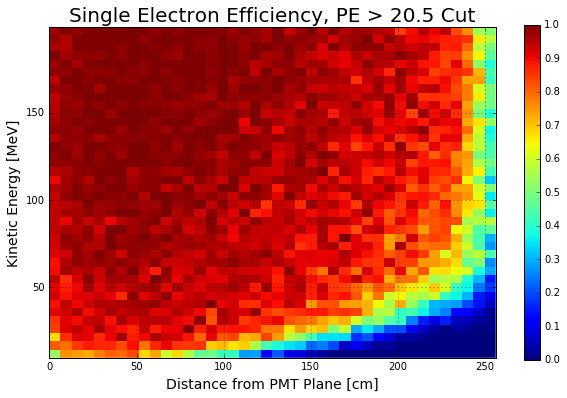

In [5]:
plotAllEffsVsEandXpos()